In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import datatable as dt

In [2]:
train = dt.fread('data/train.csv').to_pandas()

In [3]:
test = dt.fread('data/example_test.csv').to_pandas()

In [4]:
def plot_timeseries(data,feature):
    fig = plt.figure(figsize=(10, 6))
    x = range(len(data))
    y = data[feature]
    plt.plot(x, y)
    plt.grid()


def plotly_timeseries(data,x,feature):
    fig = px.scatter(data,x=x, y=feature)
    fig.show()


In [5]:
mean_weights_per_day = train[['date','weight']].groupby(['date']).mean().reset_index()
mean_resp0_per_day = train[['date','resp']].groupby('date').mean().reset_index()
mean_resp1_per_day = train[['date','resp_1']].groupby('date').mean().reset_index()
mean_resp2_per_day =train[['date','resp_2']].groupby('date').mean().reset_index()
mean_resp3_per_day =train[['date','resp_3']].groupby('date').mean().reset_index()
mean_resp4_per_day =train[['date','resp_4']].groupby('date').mean().reset_index()


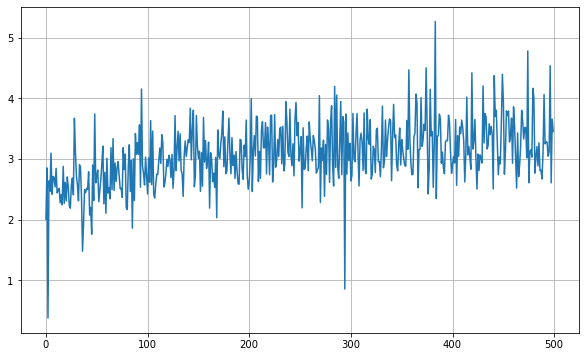

In [6]:
plot_timeseries(mean_weights_per_day,'weight')

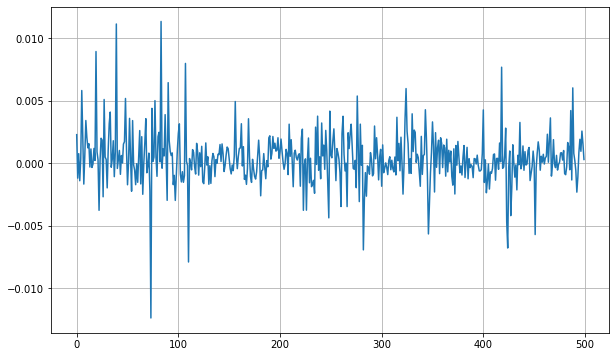

In [7]:
plot_timeseries(mean_resp0_per_day,'resp')

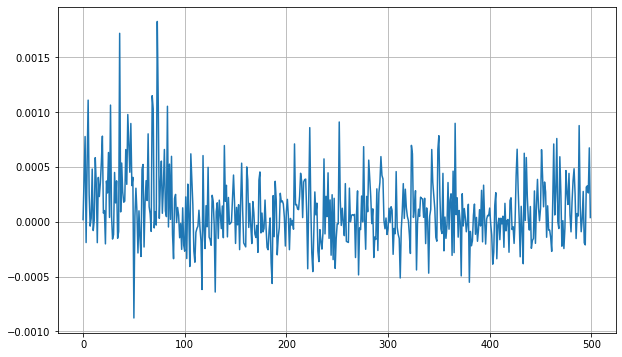

In [8]:
plot_timeseries(mean_resp1_per_day,'resp_1')

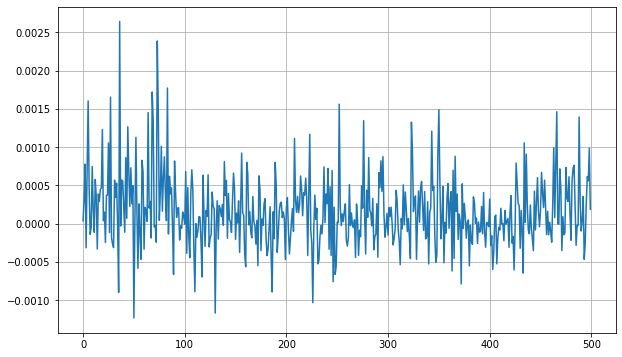

In [9]:
plot_timeseries(mean_resp2_per_day,'resp_2')

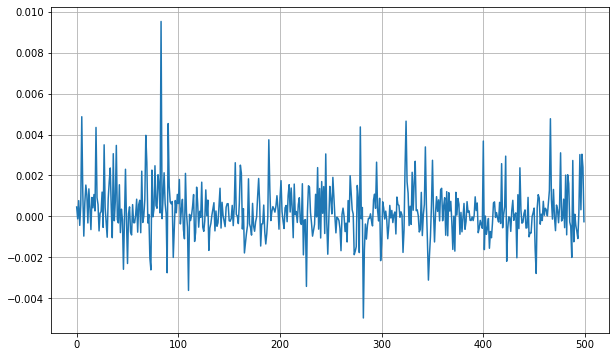

In [10]:
plot_timeseries(mean_resp3_per_day,'resp_3')

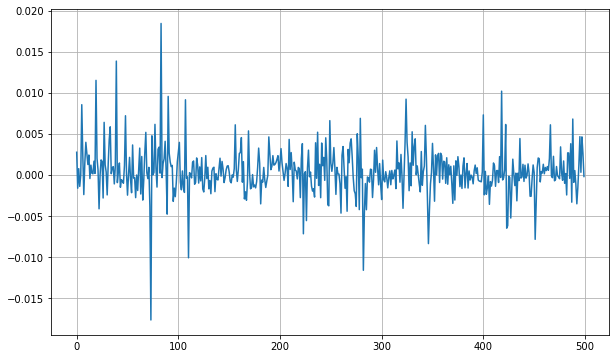

In [11]:
plot_timeseries(mean_resp4_per_day,'resp_4')

In [16]:
std_resp0 = np.std(mean_resp0_per_day['resp'])
std_resp1 = np.std(mean_resp1_per_day['resp_1'])
std_resp2 = np.std(mean_resp2_per_day['resp_2'])
std_resp3 = np.std(mean_resp3_per_day['resp_3'])
std_resp4 = np.std(mean_resp4_per_day['resp_4'])
std_resps_df = pd.DataFrame({'stds':[std_resp0,std_resp1,std_resp2,std_resp3,std_resp4]})


<BarContainer object of 5 artists>

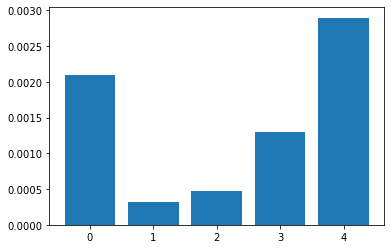

In [22]:
plt.bar(x=std_resps_df.index,height=std_resps_df['stds'])

In [35]:
def signal_to_noise(x):
    m = np.mean(x)
    std = np.std(x)
    return np.where(std == 0,0,m/std)

In [43]:
snrs = []
features  = [col for col in train.columns if 'feature' in col and 'feature_0' not in col] 

In [44]:
for col in features:
    snrs.append(signal_to_noise(train[col]))

In [45]:
snrs_df = pd.DataFrame({'snr':snrs})

<BarContainer object of 129 artists>

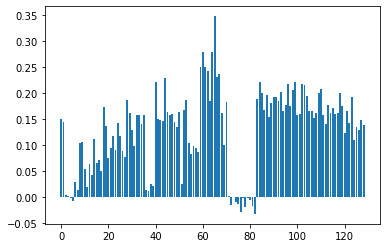

In [49]:
plt.bar(snrs_df.index,height=snrs_df['snr'])

In [62]:
features_high_snr = np.where(np.array(snrs) > 0.1,True,False)
features_high_snr = np.insert(features_high_snr,0,[True]*9,axis=0)

In [68]:
train.loc[:,features_high_snr].to_csv('filtered_train.csv')

In [54]:
corr_matrix = train.corr()

In [55]:
corr_matrix.iloc[np.where(corr_matrix.resp.abs() >0.01)].index.values

array(['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp', 'feature_0',
       'feature_1', 'feature_2', 'feature_7', 'feature_8', 'feature_9',
       'feature_11', 'feature_12', 'feature_13', 'feature_15',
       'feature_17', 'feature_18', 'feature_19', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_42',
       'feature_43', 'feature_44', 'feature_51', 'feature_53',
       'feature_69', 'feature_73', 'feature_79', 'feature_84',
       'feature_85', 'feature_89', 'feature_91', 'feature_96',
       'feature_97', 'feature_101', 'feature_103', 'feature_108',
       'feature_113', 'feature_120', 'feature_122', 'feature_124',
       'feature_126', 'feature_128', 'action'], dtype=object)

In [65]:
corr_resp = corr_matrix['resp'].copy(deep=True)

In [66]:
corr_resp.pop('resp')
corr_resp

date          -0.009035
weight        -0.008419
resp_1         0.450288
resp_2         0.594586
resp_3         0.814738
                 ...   
feature_127    0.000497
feature_128    0.019503
feature_129    0.000692
ts_id         -0.008946
action         0.558093
Name: resp, Length: 138, dtype: float64

In [67]:
corr_resp.drop(['date','weight','resp_1','resp_2','resp_3','resp_4','ts_id','action'],axis=0,inplace=True)

In [73]:
corr_resp.iloc[np.where(corr_resp.values == corr_resp.max())].index.values

array(['feature_27'], dtype=object)

In [74]:
corr_resp['feature_27']

0.048870320023996605

In [77]:
from sklearn.cluster import KMeans

In [69]:
import datetime

In [82]:
str(datetime.datetime.now().date())

'2020-12-23'